# **Digit Recognition**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

## import the dataset   
[download dataset](https://www.kaggle.com/c/digit-recognizer/data)

In [0]:
dataset = pd.read_csv("train.csv")

## Dependent and Independent variables

In [0]:
y = dataset.iloc[:,0].values
x = dataset.iloc[:,1:].values

In [5]:
dataset.shape


(42000, 785)

In [6]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dividing the dataset into train and test dataset

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=12,test_size=0.25)

## Viewing the data

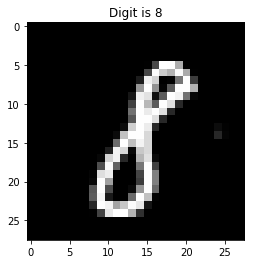

In [8]:
digit = x_train[0]
digit = digit.reshape(28,28)
plt.title("Digit is {}".format(y_train[0]))
plt.imshow(digit,cmap="gray")

## Model Creation 

In [9]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predicting the test dataset

In [0]:
y_pred = classifier.predict(x_test)

## R2 value

In [11]:
r2_score(y_true=y_test,y_pred=y_pred)

0.921462670563801

## Visualizing the  model prediction

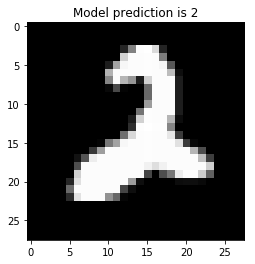

In [14]:
digit = x_test[0]
digit = digit.reshape(28,28)
plt.title("Model prediction is {}".format(y_pred[0]))
plt.imshow(digit,cmap="gray")

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1044    0    0    1    1    0    6    0    6    1]
 [   0 1157    3    5    2    4    1    1    1    0]
 [   3    3  972    9    5    1    3    6    5    1]
 [   1    0   15 1069    1   12    0    5   13    7]
 [   3    2    1    2  963    0    2    1    3   11]
 [   8    2    1   12    3  904    9    1    7    6]
 [   6    0    1    0    3   11 1028    0    2    0]
 [   2    5   13    3    4    1    0 1031    4   14]
 [   2    2    4    9    8    9    8    1  955   12]
 [   7    4    3   11   23    4    0    7    7  991]]


In [0]:
count =0
for i in range(len(y_test)):
  if(y_test[i]==y_pred[i]):
    count+=1


In [18]:
print("Total prediction are ",len(y_test))
print("Correct prediction are ",count)
print("Incorrect predictions are ",y_test.shape[0]-count)

Total prediction are  10500
Correct prediction are  10114
Incorrect predictions are  386


# The Above model has accuracy percentage of 92%